<a href="https://colab.research.google.com/github/ucheokechukwu/ml_tensorflow_deeplearning/blob/main/02_neural_network_classification_with_tensorflow_multi_class_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass Classification

All `>=3` classes is multi-class

* Goal: build a neural network for multi-class classification.
* `fashion_mnist`
- https://github.com/zalandoresearch/fashion-mnist

- https://www.tensorflow.org/datasets/catalog/fashion_mnist

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
#model_binary = tf.keras.models.load_model("/content/drive/MyDrive/ML_Tensor/binary_model.h5")

In [3]:
# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [4]:
# Show the first trianing example
print(f"Training sample:\n {train_data[0]}\n")
print(f"Training label:\n {train_labels[0]}\n")

Training sample:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [5]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

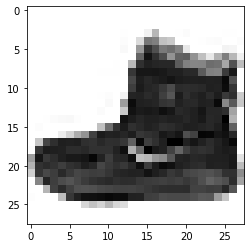

In [15]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0], cmap=plt.cm.binary)

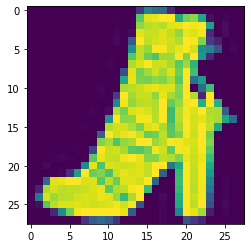

In [7]:
plt.imshow(train_data[11]);

In [8]:
train_labels[11]

9

In [9]:
# Make a list of the labels as text, not numbers

In [14]:
class_names = ["T-shirt/top",
               "Trouser",
               "Pullover",
               "Dress",
               "Coat",
               "Sandal",
               "Shirt",
               "Sneaker",
               "Bag",
               "Ankle boot"]
len(class_names)

10

In [38]:
def plot_image_label(index):
  plt.figure(figsize=(1,1))
  plt.imshow(train_data[index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[index]])

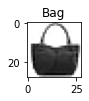

In [39]:
plot_image_label(100)

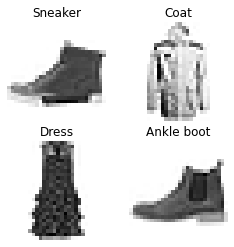

In [59]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(4,4))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  # picks a random number from the length of our training data
  rand_index = random.choice(range(len(train_data))) 
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)


In [60]:
## Building a multi-class classification model